In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

С помощью pgSQL я выбрала нужные мне данные:

In [2]:
df = pd.read_csv("table2", names = ["Order ID", "Seller ID", "Product ID", "Price", "Category", "Customer ID", "City", "State"])

In [3]:
df.head(10)

,Order ID,Seller ID,Product ID,Price,Category,Customer ID,City,State
0,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP
1,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG
2,00048cc3ae777c65dbb7d2a0634bc1ea,6426d21aca402a131fc0a5d0960a3c90,ef92defde845ab8450f9d70c526ef70f,21.90,housewares,816cbea969fe5b689b39cfc97a506742,uberaba,MG
3,0005a1a1728c9d785b8e2b08b904576c,a416b6a846a11724393025641d4edd5e,310ae3c140ff94b03219ad0adc3c778f,145.95,health_beauty,16150771dfd4776261284213b89c304e,santos,SP
4,00061f2a7bc09da83e415a52dc8a4af1,cc419e0650a3c5ba77189a1882b7556a,d63c1011f49d98b976c352955b1c4bea,59.99,health_beauty,c6fc061d86fab1e2b2eac259bac71a49,piracicaba,SP
5,0006ec9db01a64e59a68b2c340bf65a7,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,74.00,bed_bath_table,5d178120c29c61748ea95bac23cb8f25,rio de janeiro,RJ
6,0009c9a17f916a706d71784483a5d643,fcb5ace8bcc92f75707dc0f01a27d269,3f27ac8e699df3d300ec4a5d8c5cf0b2,639.00,consoles_games,8a250edc40ebc5c3940ebc940f16a7eb,campinas,SP
7,000e906b789b55f64edcb1f84030f90d,ea8482cd71df3c1969d7b9473ff13abc,57d79905de06d8897872c551bfd09358,21.99,telephony,6a3b2fc9f270df258605e22bef19fd88,santa cruz do rio pardo,SP
8,000f25f4d72195062c040b12dce9a18a,7c67e1448b00f6e969d365cea6b010ab,1c05e0964302b6cf68ca0d15f326c6ba,119.99,office_furniture,86ade8ebc14f18dd6c3ea75bd0eb7534,volta redonda,RJ
9,0014ae671de39511f7575066200733b7,92eb0f42c21942b6552362b9b114707d,23365beed316535b4105bd800c46670e,16.50,telephony,41065d9dcea52218c3943d2eed072b97,pinhais,PR


Пропущенных данных нет. Из всех признаков только один количественный - цена продукта. Остальные категориальные.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 8 columns):
Order ID       111023 non-null object
Seller ID      111023 non-null object
Product ID     111023 non-null object
Price          111023 non-null float64
Category       111023 non-null object
Customer ID    111023 non-null object
City           111023 non-null object
State          111023 non-null object
dtypes: float64(1), object(7)
memory usage: 6.8+ MB


Смотрим на распределение цен. Я ограничила их, для большей наглядности. Больше 1500 всего 325 продуктов, что составляет ~ 0.3%.

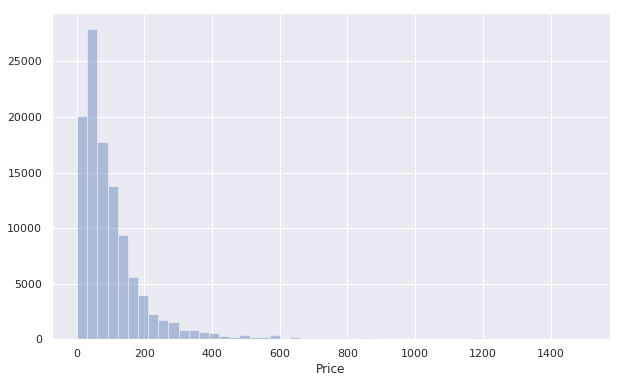

In [5]:
price = df['Price']
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(price[price < 1500], kde=False);

Здесь хорошо видно, что чаще всего покупают продукты в диапазоне 50-100. Значительно меньше заказов продуктов цены выше 200. На графике видны выбыросы.

In [6]:
price.describe()

count    111023.000000
mean        120.755104
std         183.372746
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: Price, dtype: float64

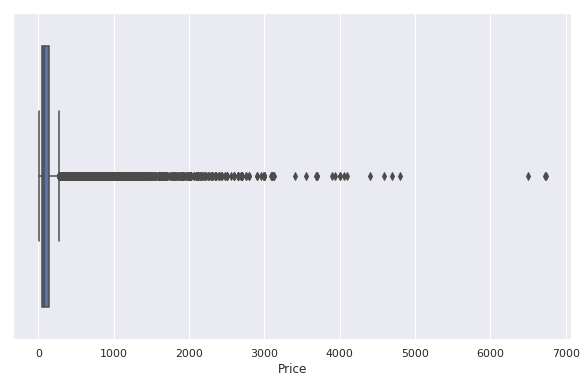

In [7]:
sns.boxplot(price)

Количество купленных продуктов каждой категории:

In [8]:
num_prod = pd.read_csv("countpr", names = ["Category", "Category in English", "Num of orders"])
num_prod.head(10)

,Category,Category in English,Num of orders
0,cama_mesa_banho,bed_bath_table,11115
1,beleza_saude,health_beauty,9670
2,esporte_lazer,sports_leisure,8641
3,moveis_decoracao,furniture_decor,8334
4,informatica_acessorios,computers_accessories,7827
5,utilidades_domesticas,housewares,6964
6,relogios_presentes,watches_gifts,5991
7,telefonia,telephony,4545
8,ferramentas_jardim,garden_tools,4347
9,automotivo,auto,4235


Здесь видно, что в основном в магазине заказывали не больше одного раза. Однако, есть люди, производившие до 21 заказов. Интересно будет потом посмотреть, как менялся этот показатель по годам. Выросло ли доверие у людей к магазину после первой покупки?

In [9]:
fr = df["Customer ID"].value_counts()
frdf = pd.DataFrame(data = fr.values)
frdf.describe()

,0
count,97256.000000
mean,1.141554
std,0.538252
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


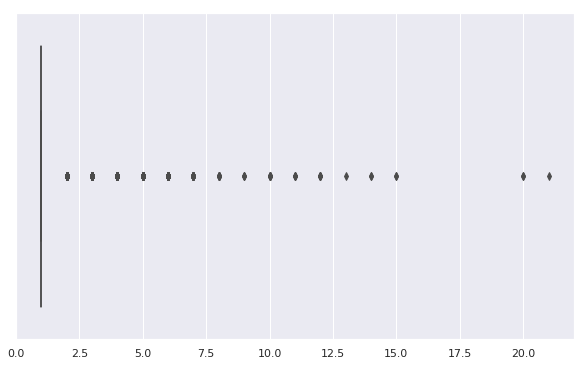

In [10]:
sns.boxplot(frdf)

Посмотрим, какие продукты покупали чаще всего:

In [11]:
product_counts = df["Product ID"].value_counts()
product_counts[product_counts.values > 250]

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
2b4609f8948be18874494203496bc318    260
Name: Product ID, dtype: int64

Как изменялось суммарное кол-во заказов в течении прошлых лет. За 2018 год данные есть только до октября.

In [12]:
ch = pd.read_csv("rise", names = ["Orders2016", "Orders2017", "Orders2018"])
ch

,Orders2016,Orders2017,Orders2018
0,322,44973,53986


Посмотрим, в каких городах и штатах чаще всего производят покупки и их суммарную стоимость:

In [13]:
df_city = pd.read_csv("file3", names = ["City", "State", "Sum of orders", "Num of orders"])
df_city.head(15)

,City,State,Sum of orders,Num of orders
0,sao paulo,SP,1914890.0,17808
1,rio de janeiro,RJ,992554.0,7837
2,belo horizonte,MG,355612.0,3144
3,brasilia,DF,301920.0,2392
4,curitiba,PR,211738.0,1751
5,campinas,SP,187844.0,1654
6,porto alegre,RS,190562.0,1612
7,salvador,BA,181104.0,1412
8,guarulhos,SP,144268.0,1329
9,sao bernardo do campo,SP,104541.0,1060


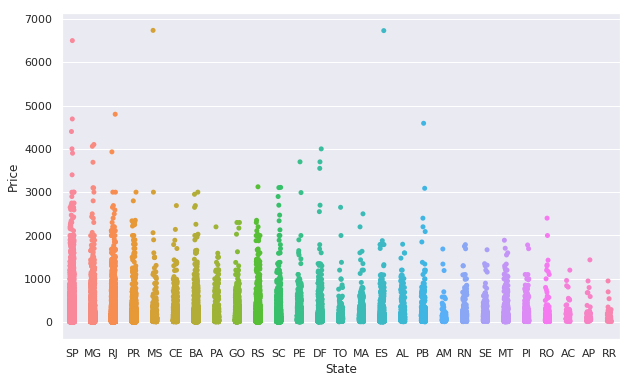

In [14]:
sns.stripplot(x="State", y="Price", data=df, jitter=True);